In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13714, done.
remote: Total 13714 (delta 0), reused 0 (delta 0), pack-reused 13714
Receiving objects: 100% (13714/13714), 12.31 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (9357/9357), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-15 10:18:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   113KB/s    in 36m 23s 

2020-06-15 10:55:01 (111 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

Mounting drive



In [ ]:
%cd ..
from google.colab import drive
drive.mount('/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
#%cd ..
!ln -s /gdrive/My\ Drive/ /mydrive
!ls /mydrive/Maxmoc

backup	 dance.jpg	    obj.data   obj.zip	 train.jpg  yolov3_custom.cfg
car.jpg  generate_train.py  obj.names  test.jpg  truck.jpg


In [ ]:
%cd /gdrive/
!ls My\ Drive/Maxmoc

/gdrive
backup	 dance.jpg	    obj.data   obj.zip	 train.jpg  yolov3_custom.cfg
car.jpg  generate_train.py  obj.names  test.jpg  truck.jpg


loading and unziping image files with labels

```
# This is formatted as code
```




In [ ]:
#!cp /gdrive/My\ Drive/Maxmoc/obj.zip ../  
#is not able to copy

In [ ]:
#checking path
%cd /content/darknet
!ls 

/content/darknet
3rdparty   CMakeLists.txt	   image_yolov3.sh	  README.md
backup	   darknet		   include		  results
build	   DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1  darknet.py		   LICENSE		  src
build.sh   darknet_video.py	   Makefile		  video_v2.sh
cfg	   data			   net_cam_v3.sh	  video_yolov3.sh
cmake	   image_yolov2.sh	   obj


In [ ]:
#checking path
%cd /gdrive/My\ Drive/Maxmoc/
!ls

/gdrive/My Drive/Maxmoc
backup	 dance.jpg	    obj.data   obj.zip	 train.jpg  yolov3_custom.cfg
car.jpg  generate_train.py  obj.names  test.jpg  truck.jpg


In [ ]:
!unzip /gdrive/My\ Drive/Maxmoc/obj.zip -d /content/darknet/data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/darknet/data/obj/f69e273b5cdc8109.txt  
  inflating: /content/darknet/data/obj/c9eba10a5e9c58b0.txt  
  inflating: /content/darknet/data/obj/472a0f2cae1b71a0.jpg  
  inflating: /content/darknet/data/obj/aaaa800cc937d4bf.jpg  
  inflating: /content/darknet/data/obj/b8afb73334125a0a.txt  
  inflating: /content/darknet/data/obj/a25938b696bac5a3.jpg  
  inflating: /content/darknet/data/obj/e2389bfbb663fc99.txt  
  inflating: /content/darknet/data/obj/dcaa7bc5b871f373.jpg  
  inflating: /content/darknet/data/obj/b13a6065f1903bae.txt  
  inflating: /content/darknet/data/obj/92f36bfe8bcd0cbe.jpg  
  inflating: /content/darknet/data/obj/9b4a778c5fc70443.jpg  
  inflating: /content/darknet/data/obj/a5f4a8ded409dad9.txt  
  inflating: /content/darknet/data/obj/30397a0435176788.jpg  
  inflating: /content/darknet/data/obj/53b8edb274e236dd.txt  
  inflating: /content/darknet/data/obj/30d959c674b60f35.txt  
  inflating: /conte

changing conf files

In [ ]:
#download('cfg/yolov3.cfg')

NameError: ignored

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

cp: cannot stat 'cfg/yolov3.cfg': No such file or directory


In [ ]:
%cd /content/darknet


/content/darknet


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
#%cd ..
!cp /mydrive/Maxmoc/yolov3_custom.cfg ./cfg
#%cd darknet
#
#%cd cfg
#upload()
#%cd .. 

Obj.names and obj.data

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Maxmoc/obj.names ./data
!cp /mydrive/Maxmoc/obj.data  ./data


#%cd data
#upload()
#%cd .. 

In [ ]:
!ls /content/darknet/data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     voc.names
coco.names  goal.txt	 labels			   openimages.names
dog.jpg     horses.jpg	 obj			   person.jpg


Generating train

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Maxmoc/generate_train.py ./


#upload()


In [ ]:
%ls /content/darknet/data/
%cd /content/darknet/

9k.tree     eagle.jpg    imagenet.labels.list      obj.data          scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names         voc.names
coco.names  goal.txt     labels/                   openimages.names
dog.jpg     horses.jpg   obj/                      person.jpg
/content/darknet


In [ ]:
!python generate_train.py

In [ ]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


Pre-trained for convolution layer


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-06-16 11:54:59--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-06-16 11:55:00--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   273KB/s    in 15m 45s 

2020-06-16 12:10:47 (168 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



to train with no interupt
Ctrl+shift+i

function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button#connect").click() 
}

setInterval(ClickConnect,60000)

In [ ]:
# train y
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

#if no memory change random to 0 in configuration file
#wait for loss under 2

Streaming output truncated to the last 5000 lines.
 total_bbox = 241940, rewritten_bbox = 0.525750 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.815442, GIOU: 0.807546), Class: 0.966168, Obj: 0.419948, No Obj: 0.002440, .5R: 1.000000, .75R: 0.800000, count: 5, class_loss = 0.524928, iou_loss = 0.167118, total_loss = 0.692045 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.581713, GIOU: 0.581713), Class: 0.503570, Obj: 0.212614, No Obj: 0.000308, .5R: 1.000000, .75R: 0.000000, count: 2, class_loss = 0.748508, iou_loss = 0.220479, total_loss = 0.968987 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000010, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000221, iou_loss = 0.000000, total_loss = 0.000221 
 total_bbox = 241947, rewritten_bbox = 0.525735 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.726360, GIOU:

In [ ]:
imShow('chart.png')

AttributeError: ignored

In [ ]:
!ls /gdrive/My\ Drive/Maxmoc/backup//

yolov3_custom_1000.weights  yolov3_custom_last.weights


In [ ]:
#if it stops
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /gdrive/My\ Drive/Maxmoc/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.682168, GIOU: 0.678413), Class: 0.961262, Obj: 0.281711, No Obj: 0.003227, .5R: 1.000000, .75R: 0.500000, count: 4, class_loss = 0.643709, iou_loss = 0.388815, total_loss = 1.032524 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.746765, GIOU: 0.741376), Class: 0.512636, Obj: 0.468921, No Obj: 0.000657, .5R: 1.000000, .75R: 0.666667, count: 3, class_loss = 0.735636, iou_loss = 0.117331, total_loss = 0.852966 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000035, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.001602, iou_loss = 0.000000, total_loss = 0.001602 
 total_bbox = 197849, rewritten_bbox = 0.508469 % 

 3400: 0.923963, 0.778945 avg loss, 0.001000 rate, 8.423809 seconds, 217600 images, 9.770325 hours left
Saving weights to /mydrive/Max

testing for images

In [ ]:
# changing custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
%cd /content/darknet
!ls

/content/darknet
3rdparty   CMakeLists.txt	   image_yolov2.sh	  obj
backup	   darknet		   image_yolov3.sh	  README.md
build	   DarknetConfig.cmake.in  include		  results
build.ps1  darknet.py		   json_mjpeg_streams.sh  scripts
build.sh   darknet_video.py	   LICENSE		  src
cfg	   data			   Makefile		  video_v2.sh
cmake	   generate_train.py	   net_cam_v3.sh	  video_yolov3.sh


In [ ]:
#!./darknet detect cfg/yolov3_custom.cfg /mydrive/Maxmoc/backup/yolov3_custom_last.weights /mydrive/Maxmoc/test.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Maxmoc/backup/yolov3_custom_last.weights /mydrive/Maxmoc/car.jpg -thresh 0.3

/bin/bash: ./darknet: Is a directory


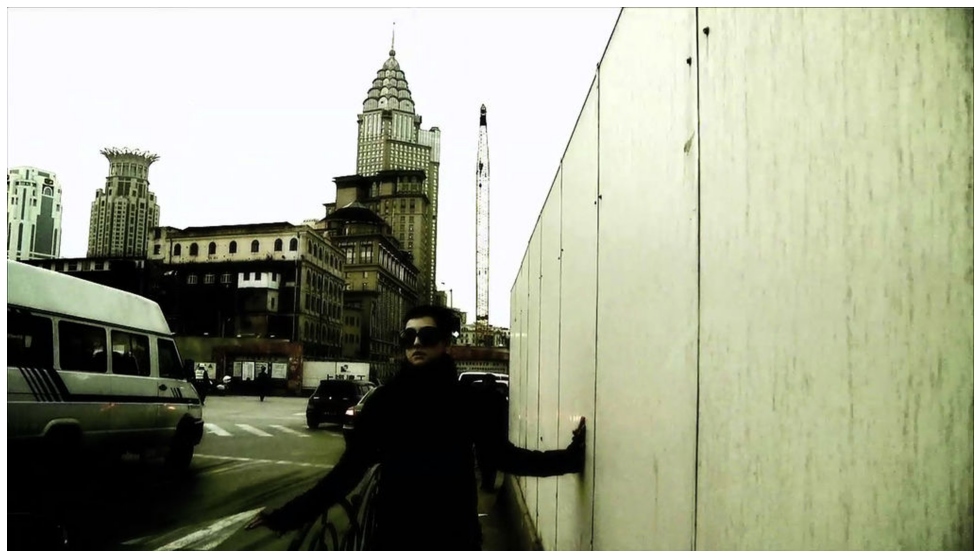

In [ ]:
imShow('predictions.jpg')

/bin/bash: -c: line 0: syntax error near unexpected token `/content/darknet/data/obj/4f8ab00dfa94308c.jpg'
/bin/bash: -c: line 0: `download(/content/darknet/data/obj/4f8ab00dfa94308c.jpg)'
